**Stock Prediction using KNN algorithm**


***Importing important libraries***

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

***Tesla Dataset***

> In this project, I select tesla datasets which play a crucial role as they form the foundation for training and evaluating machine learning models i.e KNN algorithm for stock market price prediction. Dataset represents historical stock market data for different assets, and understanding their characteristics is vital for building effective predictive models.


> Features of dataset
* Date: Essential for organizing data chronologically and identifying trends over time.
* Open: The opening price of Datasets on a given day.
* High: The highest price of Datasets on a given day.
* Low: The lowest price of Datasets on a given day.
* Close: The closing price of Datasets on a given day.
* Adj Close: The adjusted closing price of Datasets on a given day, considering dividends, stock splits, etc.
* Volume: The volume of Datasets traded on a given day.







*Load the dataset*

In [145]:
data = pd.read_csv('TESLA.csv')
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2    2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3    2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4    2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
..          ...         ...         ...         ...         ...         ...   
248  2022-09-23  283.089996  284.500000  272.820007  275.329987  275.329987   
249  2022-09-26  271.829987  284.089996  270.309998  276.010010  276.010010   
250  2022-09-27  283.839996  288.670013  277.510010  282.940002  282.940002   
251  2022-09-28  283.079987  289.000000  277.570007  287.809998  287.809998   
252  2022-09-29  282.760010  283.649994  265.779999  268.209991  268.209991   

       Volume  
0    62828700  
1    53868000  
2  

*Quick peek at functions:*

In [146]:
data.shape

(253, 7)

In [147]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [148]:
print(data.describe())

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   300.136008  307.486021  292.114058  299.709104  299.709104   
std     46.139272   46.789896   44.685331   45.788283   45.788283   
min    207.949997  217.973328  206.856674  209.386673  209.386673   
25%    266.513336  273.166656  260.723328  266.923340  266.923340   
50%    298.500000  303.709991  289.130005  296.666656  296.666656   
75%    335.600006  344.950012  327.510010  336.336670  336.336670   
max    411.470001  414.496674  405.666656  409.970001  409.970001   

             Volume  
count  2.530000e+02  
mean   8.050938e+07  
std    2.546595e+07  
min    3.504270e+07  
25%    6.255570e+07  
50%    7.695630e+07  
75%    9.347310e+07  
max    1.885563e+08  


In [149]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB
None


*Data Preprocessing*

> Handling Missing Values:



In [150]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values After Handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




> Feature Scaling



In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['High']] = scaler.fit_transform(data[['High']])
data[['Low']] = scaler.fit_transform(data[['Low']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,0.236749,0.251681,260.436676,260.436676,62828700
1,2021-09-30,260.333344,0.229337,0.258924,258.493347,258.493347,53868000
2,2021-10-01,259.466675,0.215174,0.239793,258.406677,258.406677,51094200
3,2021-10-04,265.500000,0.259596,0.260802,260.510010,260.510010,91449900
4,2021-10-05,261.600006,0.243211,0.257583,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,0.338518,0.331791,275.329987,275.329987,63615400
249,2022-09-26,271.829987,0.336432,0.319166,276.010010,276.010010,58076900
250,2022-09-27,283.839996,0.359737,0.355381,282.940002,282.940002,61925200
251,2022-09-28,283.079987,0.361416,0.355683,287.809998,287.809998,54664800




> Feature Engineering



In [152]:
data['DailyReturn'] = data['Adj Close'].pct_change() * 100
data['MovingAverage'] = data['Adj Close'].rolling(window=5).mean()
data['PriceToVolumeRatio'] = data['Adj Close']/data['Volume']
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,MovingAverage,PriceToVolumeRatio
4,2021-10-05,261.600006,0.243211,0.257583,260.196655,260.196655,55297800,-0.120285,259.608673,0.000005
5,2021-10-06,258.733337,0.225147,0.255939,260.916656,260.916656,43898400,0.276714,259.704669,0.000006
6,2021-10-07,261.820007,0.256255,0.272974,264.536682,264.536682,57587400,1.387426,260.913336,0.000005
7,2021-10-08,265.403320,0.241634,0.268833,261.829987,261.829987,50215800,-1.023183,261.597998,0.000005
8,2021-10-11,262.549988,0.249877,0.276529,263.980011,263.980011,42600900,0.821153,262.291998,0.000006
...,...,...,...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,0.338518,0.331791,275.329987,275.329987,63615400,-4.594757,296.503998,0.000004
249,2022-09-26,271.829987,0.336432,0.319166,276.010010,276.010010,58076900,0.246985,289.891998,0.000005
250,2022-09-27,283.839996,0.359737,0.355381,282.940002,282.940002,61925200,2.510776,284.733997,0.000005
251,2022-09-28,283.079987,0.361416,0.355683,287.809998,287.809998,54664800,1.721212,282.135999,0.000005


> Data Splitting and Model Training

In [153]:
features = ['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage', 'PriceToVolumeRatio']
X = data[features]
Y = data['Close']
print(X.columns)
print(Y.name)

Index(['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage',
       'PriceToVolumeRatio'],
      dtype='object')
Close


In [154]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (199, 7)
X_test shape: (50, 7)
y_train shape: (199,)
y_test shape: (50,)


In [156]:
model = KNeighborsRegressor(n_neighbors=5)

> Model Evaluation

In [157]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([338.7519956, 290.115338 , 272.4546632, 318.5813414, 272.2493318,
       353.4106626, 315.7446718, 302.3299988, 289.621994 , 304.7739928,
       275.61467  , 334.5886654, 317.1960024, 260.119336 , 264.4613314,
       288.2186706, 277.995337 , 287.5153352, 301.3866636, 310.0213288,
       304.5679992, 287.5153352, 310.0213288, 306.621997 , 289.604672 ,
       290.115338 , 299.8953308, 304.981329 , 334.5886654, 321.6039976,
       353.8433286, 321.0246704, 307.6713348, 260.7206696, 287.5153352,
       291.9799926, 278.502002 , 309.2646668, 341.9459958, 275.61467  ,
       318.1113344, 307.6140016, 310.1153384, 315.7446718, 299.5053282,
       304.5353392, 305.2959958, 277.8639986, 267.9080018, 296.1026736])

In [158]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3304.5078807374466


In [159]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 48.35


In [160]:
 # Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: -0.18


In [161]:
df_results = pd.DataFrame({'Date': pd.to_datetime(y_test.index, format='%Y-%m-%d'),
                           'Actual_Close': y_test.values,
                           'Predicted_Close': predictions})

# Display the new DataFrame
print(df_results)

                            Date  Actual_Close  Predicted_Close
0  1970-01-01 00:00:00.000000141    336.260010       338.751996
1  1970-01-01 00:00:00.000000010    270.359985       290.115338
2  1970-01-01 00:00:00.000000101    254.679993       272.454663
3  1970-01-01 00:00:00.000000064    356.779999       318.581341
4  1970-01-01 00:00:00.000000116    280.076660       272.249332
5  1970-01-01 00:00:00.000000184    235.070007       353.410663
6  1970-01-01 00:00:00.000000200    240.546661       315.744672
7  1970-01-01 00:00:00.000000187    232.663330       302.329999
8  1970-01-01 00:00:00.000000013    290.036682       289.621994
9  1970-01-01 00:00:00.000000108    279.429993       304.773993
10 1970-01-01 00:00:00.000000203    271.706665       275.614670
11 1970-01-01 00:00:00.000000219    300.029999       334.588665
12 1970-01-01 00:00:00.000000205    268.433319       317.196002
13 1970-01-01 00:00:00.000000243    303.350006       260.119336
14 1970-01-01 00:00:00.000000071    352.

<Axes: >

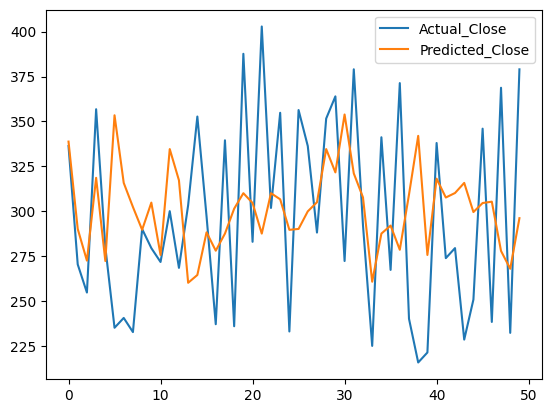

In [162]:
df_results[['Actual_Close', 'Predicted_Close']].plot()

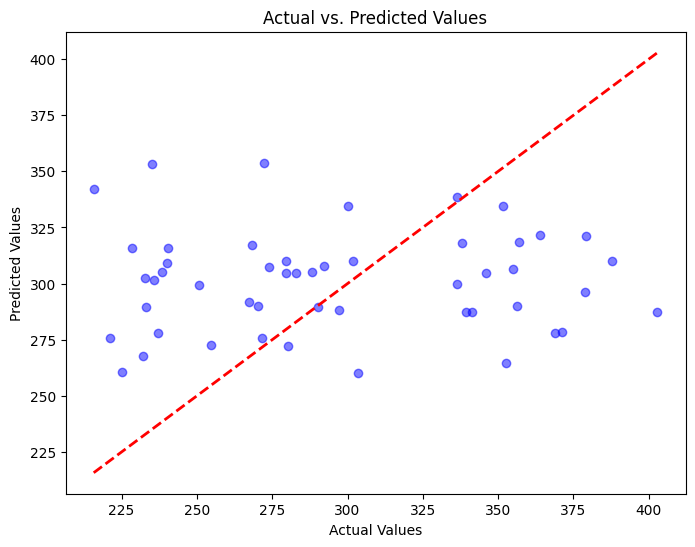

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Stock Prediction using KNN**

***Importing important libraries***

In [164]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

***NEtflix Dataset***

> In this project, I select netflix datasets which play a crucial role as they form the foundation for training and evaluating machine learning models i.e KNN algorithm  for stock market price prediction. Dataset represents historical stock market data for different assets, and understanding their characteristics is vital for building effective predictive models.


> Features of dataset
* Date: Essential for organizing data chronologically and identifying trends over time.
* Open: The opening price of Datasets on a given day.
* High: The highest price of Datasets on a given day.
* Low: The lowest price of Datasets on a given day.
* Close: The closing price of Datasets on a given day.
* Adj Close: The adjusted closing price of Datasets on a given day, considering dividends, stock splits, etc.
* Volume: The volume of Datasets traded on a given day.







*Load the dataset*

In [165]:
data = pd.read_csv('NFLX.csv')
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

*Quick peek at functions:*

In [166]:
data.shape

(1009, 7)

In [167]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [168]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


In [169]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


*Data Preprocessing*

> Handling Missing Values:



In [170]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values After Handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




> Feature Scaling



In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['High']] = scaler.fit_transform(data[['High']])
data[['Low']] = scaler.fit_transform(data[['Low']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,0.038304,0.041331,254.259995,254.259995,11896100
1,2018-02-06,247.699997,0.035640,0.030273,265.720001,265.720001,12595800
2,2018-02-07,266.579987,0.048408,0.072770,264.559998,264.559998,8981500
3,2018-02-08,267.079987,0.037683,0.041265,250.100006,250.100006,9306700
4,2018-02-09,253.850006,0.011436,0.010729,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,0.393147,0.367080,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,0.461496,0.427186,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,0.447062,0.429253,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,0.396611,0.380447,405.600006,405.600006,9905200




> Feature Engineering



In [172]:
data['DailyReturn'] = data['Adj Close'].pct_change() * 100
data['MovingAverage'] = data['Adj Close'].rolling(window=5).mean()
data['PriceToVolumeRatio'] = data['Adj Close']/data['Volume']
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,MovingAverage,PriceToVolumeRatio
4,2018-02-09,253.850006,0.011436,0.010729,249.470001,249.470001,16906900,-0.251901,256.822000,0.000015
5,2018-02-12,252.139999,0.018875,0.039067,257.950012,257.950012,8534900,3.399211,257.560004,0.000030
6,2018-02-13,257.290009,0.023893,0.051598,258.269989,258.269989,6855200,0.124046,256.070001,0.000038
7,2018-02-14,260.470001,0.042701,0.063976,266.000000,266.000000,10972000,2.992996,256.358002,0.000024
8,2018-02-15,270.029999,0.066283,0.080025,280.269989,280.269989,10759700,5.364658,262.391998,0.000026
...,...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,0.393147,0.367080,427.140015,427.140015,20047500,11.130199,384.864007,0.000021
1005,2022-02-01,432.959991,0.461496,0.427186,457.130005,457.130005,22542300,7.021115,403.006006,0.000020
1006,2022-02-02,448.250000,0.447062,0.429253,429.480011,429.480011,14346000,-6.048606,416.962006,0.000030
1007,2022-02-03,421.440002,0.396611,0.380447,405.600006,405.600006,9905200,-5.560213,420.742004,0.000041


> Data Splitting and Model Training

In [173]:
features = ['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage', 'PriceToVolumeRatio']
X = data[features]
Y = data['Close']
print(X.columns)
print(Y.name)

Index(['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage',
       'PriceToVolumeRatio'],
      dtype='object')
Close


In [174]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (804, 7)
X_test shape: (201, 7)
y_train shape: (804,)
y_test shape: (201,)


In [176]:
model = KNeighborsRegressor(n_neighbors=5)

> Model Evaluation

In [177]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([527.4500058, 420.5859984, 455.4920044, 301.0100036, 304.6859986,
       462.7939942, 332.8659972, 380.3780028, 421.2599974, 422.7600038,
       583.4720092, 355.7380004, 527.0940002, 380.6939942, 455.1580018,
       379.5859986, 517.1260008, 540.3160094, 352.0339906, 341.9880006,
       537.2559936, 412.1899964, 329.0400026, 349.6099976, 418.7480042,
       302.6859988, 350.745996 , 385.0899962, 366.2820006, 552.1880064,
       497.4339904, 594.5160156, 309.4859984, 330.3040038, 415.4000062,
       400.0799988, 480.5099916, 397.7959962, 347.0860048, 338.1320006,
       351.4619934, 394.5840026, 474.8040038, 533.6380126, 383.597992 ,
       335.4619996, 394.601996 , 375.7400024, 355.5700014, 591.9719848,
       425.3180054, 425.6460084, 350.8180056, 439.2160036, 392.9379884,
       387.9419984, 369.9419984, 366.5900024, 379.069995 , 371.2580016,
       538.7680054, 456.8739992, 355.923999 , 445.3960022, 445.3960022,
       372.082001 , 398.6059996, 354.296002 , 414.2939942, 498.2

In [178]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8564.582724485952


In [179]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 73.94


In [180]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: 0.29


In [181]:
df_results = pd.DataFrame({'Date': pd.to_datetime(y_test.index, format='%Y-%m-%d'),
                           'Actual_Close': y_test.values,
                           'Predicted_Close': predictions})

# Display the new DataFrame
print(df_results)

                             Date  Actual_Close  Predicted_Close
0   1970-01-01 00:00:00.000000930    633.799988       527.450006
1   1970-01-01 00:00:00.000000634    475.470001       420.585998
2   1970-01-01 00:00:00.000000686    488.239990       455.492004
3   1970-01-01 00:00:00.000000518    371.709991       301.010004
4   1970-01-01 00:00:00.000000369    326.459991       304.685999
..                            ...           ...              ...
196 1970-01-01 00:00:00.000000212    265.140015       319.905994
197 1970-01-01 00:00:00.000000782    524.030029       548.869989
198 1970-01-01 00:00:00.000000338    351.269989       431.425989
199 1970-01-01 00:00:00.000000214    265.320007       329.040003
200 1970-01-01 00:00:00.000000354    381.720001       513.587988

[201 rows x 3 columns]


<Axes: >

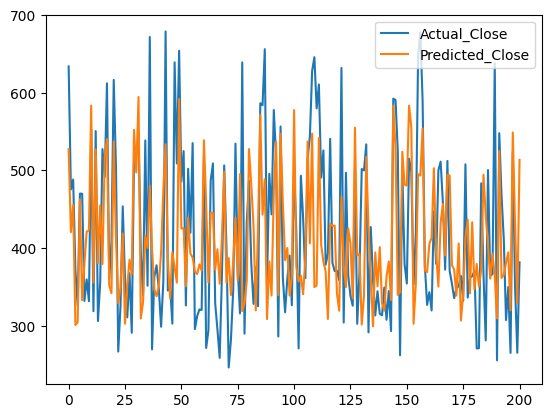

In [182]:
df_results[['Actual_Close', 'Predicted_Close']].plot()

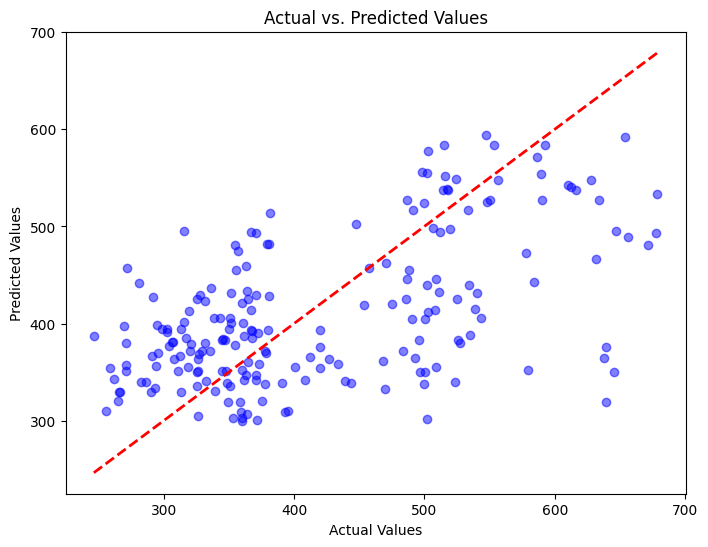

In [183]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Stock Prediction using KNN**

***Importing important libraries***

In [184]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

***Bitcoin Dataset***

> In this project, I select Bitcoin datasets which play a crucial role as they form the foundation for training and evaluating machine learning models i.e KNN algorithm  for stock market price prediction. Dataset represents historical stock market data for different assets, and understanding their characteristics is vital for building effective predictive models.


> Features of dataset
* Date: Essential for organizing data chronologically and identifying trends over time.
* Open: The opening price of Datasets on a given day.
* High: The highest price of Datasets on a given day.
* Low: The lowest price of Datasets on a given day.
* Close: The closing price of Datasets on a given day.
* Adj Close: The adjusted closing price of Datasets on a given day, considering dividends, stock splits, etc.
* Volume: The volume of Datasets traded on a given day.







*Load the dataset*

In [185]:
data = pd.read_csv('BTC-USD.csv')
print(data)

           Date          Open          High           Low         Close  \
0    2022-12-19  16759.041016  16807.527344  16398.136719  16439.679688   
1    2022-12-20  16441.787109  17012.984375  16427.867188  16906.304688   
2    2022-12-21  16904.527344  16916.800781  16755.912109  16817.535156   
3    2022-12-22  16818.380859  16866.673828  16592.408203  16830.341797   
4    2022-12-23  16829.644531  16905.218750  16794.458984  16796.953125   
..          ...           ...           ...           ...           ...   
361  2023-12-15  43028.250000  43087.824219  41692.968750  41929.757813   
362  2023-12-16  41937.742188  42664.945313  41723.113281  42240.117188   
363  2023-12-17  42236.109375  42359.496094  41274.542969  41364.664063   
364  2023-12-18  41348.203125  42720.296875  40530.257813  42623.539063   
365  2023-12-19  42641.511719  43281.062500  41848.339844  42150.578125   

        Adj Close       Volume  
0    16439.679688  17221074814  
1    16906.304688  22722096615  


*Quick peek at functions:*

In [186]:
data.shape

(366, 7)

In [187]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [188]:
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count    366.000000    366.000000    366.000000    366.000000    366.000000   
mean   27892.374450  28351.467635  27512.248116  27961.859242  27961.859242   
std     5679.175786   5798.605380   5573.093646   5698.534708   5698.534708   
min    16441.787109  16628.986328  16398.136719  16439.679688  16439.679688   
25%    25614.489746  25957.333008  24999.646973  25754.951660  25754.951660   
50%    27438.595703  27926.062500  26966.659179  27461.631836  27461.631836   
75%    29913.611817  30364.928223  29675.398926  29975.025390  29975.025390   
max    44180.019531  44705.515625  43627.597656  44166.601563  44166.601563   

             Volume  
count  3.660000e+02  
mean   1.802335e+10  
std    8.494735e+09  
min    5.331173e+09  
25%    1.200029e+10  
50%    1.575343e+10  
75%    2.262914e+10  
max    5.462223e+10  


In [189]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB
None


*Data Preprocessing*

> Handling Missing Values:



In [190]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values After Handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




> Feature Scaling



In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['High']] = scaler.fit_transform(data[['High']])
data[['Low']] = scaler.fit_transform(data[['Low']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,16759.041016,0.006359,0.000000,16439.679688,16439.679688,17221074814
1,2022-12-20,16441.787109,0.013677,0.001092,16906.304688,16906.304688,22722096615
2,2022-12-21,16904.527344,0.010251,0.013139,16817.535156,16817.535156,14882945045
3,2022-12-22,16818.380859,0.008466,0.007135,16830.341797,16830.341797,16441573050
4,2022-12-23,16829.644531,0.009839,0.014555,16796.953125,16796.953125,15329265213
...,...,...,...,...,...,...,...
361,2023-12-15,43028.250000,0.942383,0.928951,41929.757813,41929.757813,19639442462
362,2023-12-16,41937.742188,0.927321,0.930058,42240.117188,42240.117188,14386729590
363,2023-12-17,42236.109375,0.916442,0.913584,41364.664063,41364.664063,16678702876
364,2023-12-18,41348.203125,0.929293,0.886250,42623.539063,42623.539063,25224642008




> Feature Engineering



In [192]:
data['DailyReturn'] = data['Adj Close'].pct_change() * 100
data['MovingAverage'] = data['Adj Close'].rolling(window=5).mean()
data['PriceToVolumeRatio'] = data['Adj Close']/data['Volume']
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,MovingAverage,PriceToVolumeRatio
4,2022-12-23,16829.644531,0.009839,0.014555,16796.953125,16796.953125,15329265213,-0.198384,16758.162891,0.000001
5,2022-12-24,16796.976563,0.008396,0.014521,16847.755859,16847.755859,9744636213,0.302452,16839.778125,0.000002
6,2022-12-25,16847.505859,0.008248,0.013115,16841.986328,16841.986328,11656379938,-0.034245,16826.914453,0.000001
7,2022-12-26,16842.250000,0.010369,0.015213,16919.804688,16919.804688,11886957804,0.462050,16847.368359,0.000001
8,2022-12-27,16919.291016,0.011784,0.008959,16717.173828,16717.173828,15748580239,-1.197596,16824.734766,0.000001
...,...,...,...,...,...,...,...,...,...,...
361,2023-12-15,43028.250000,0.942383,0.928951,41929.757813,41929.757813,19639442462,-2.543268,42107.705469,0.000002
362,2023-12-16,41937.742188,0.927321,0.930058,42240.117188,42240.117188,14386729590,0.740189,42306.962500,0.000003
363,2023-12-17,42236.109375,0.916442,0.913584,41364.664063,41364.664063,16678702876,-2.072563,42289.850782,0.000002
364,2023-12-18,41348.203125,0.929293,0.886250,42623.539063,42623.539063,25224642008,3.043358,42236.410157,0.000002


> Data Splitting and Model Training

In [193]:
features = ['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage', 'PriceToVolumeRatio']
X = data[features]
Y = data['Close']
print(X.columns)
print(Y.name)

Index(['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage',
       'PriceToVolumeRatio'],
      dtype='object')
Close


In [194]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (289, 7)
X_test shape: (73, 7)
y_train shape: (289,)
y_test shape: (73,)


In [196]:
model = KNeighborsRegressor(n_neighbors=5)

> Model Evaluation

In [197]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([29571.0156252, 23985.204297 , 28219.8890628, 26676.7347656,
       29831.9519532, 30464.5976566, 27847.2226564, 30738.700781 ,
       27832.6265626, 31944.6960938, 27206.753125 , 26676.7347656,
       27089.8589844, 36628.503125 , 27233.3253906, 27238.815625 ,
       27415.023828 , 26160.6097656, 32437.811719 , 31157.1246096,
       30635.2007814, 25281.1023438, 28247.8019532, 27700.346875 ,
       26676.7347656, 30700.8101564, 27128.6621094, 27031.3660158,
       27080.9558594, 23107.6933594, 35607.3890626, 27708.6039064,
       30947.2867188, 27124.0515624, 27122.5679688, 29753.7832032,
       26331.2265628, 36628.503125 , 27238.815625 , 25160.9488282,
       30635.2007814, 24325.4601562, 34779.9734376, 27978.0679688,
       25187.2636718, 36628.503125 , 28898.6980472, 32807.5011718,
       29929.0074218, 32437.811719 , 27832.6265626, 28740.7902346,
       28384.3296874, 28220.5421878, 28020.1847656, 32827.1222658,
       27122.5679688, 30051.5839844, 29785.3464842, 36628.5031

In [198]:
print("Performance (R^2): ", model.score(X_train, y_train))

Performance (R^2):  0.26154890930571784


In [199]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 53794226.61303316


In [200]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 5279.75


In [201]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: -0.61


In [202]:
df_results = pd.DataFrame({'Date': pd.to_datetime(y_test.index, format='%Y-%m-%d'),
                           'Actual_Close': y_test.values,
                           'Predicted_Close': predictions})

# Display the new DataFrame
print(df_results)

                            Date  Actual_Close  Predicted_Close
0  1970-01-01 00:00:00.000000167  27119.066406     29571.015625
1  1970-01-01 00:00:00.000000037  23117.859375     23985.204297
2  1970-01-01 00:00:00.000000019  16955.078125     28219.889063
3  1970-01-01 00:00:00.000000326  37313.968750     26676.734766
4  1970-01-01 00:00:00.000000061  24641.277344     29831.951953
..                           ...           ...              ...
68 1970-01-01 00:00:00.000000301  28519.466797     27124.051562
69 1970-01-01 00:00:00.000000086  24375.960938     32039.272656
70 1970-01-01 00:00:00.000000098  27139.888672     26349.621484
71 1970-01-01 00:00:00.000000345  37858.492188     30738.700781
72 1970-01-01 00:00:00.000000307  29993.896484     28354.484375

[73 rows x 3 columns]


<Axes: >

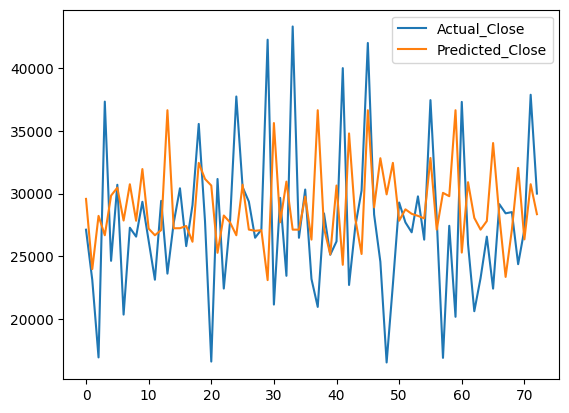

In [203]:
df_results[['Actual_Close', 'Predicted_Close']].plot()

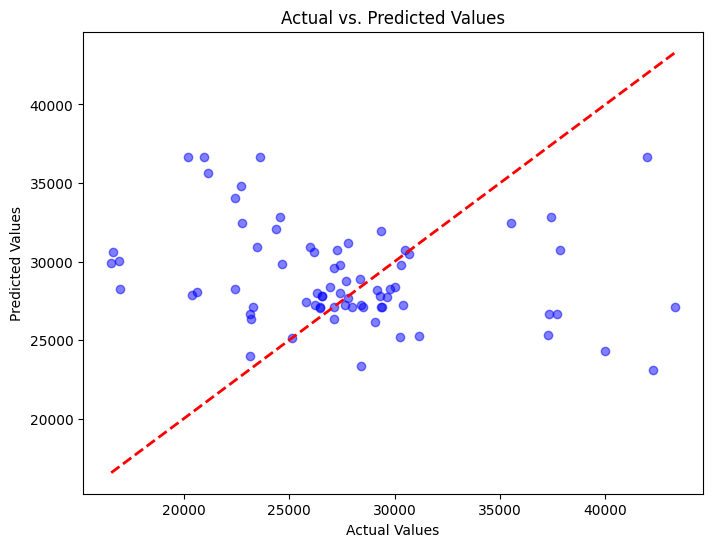

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

*** Binance Dataset***

> In this project, I select  Binance datasets which play a crucial role as they form the foundation for training and evaluating machine learning models i.e KNN algorithm for stock market price prediction. Dataset represents historical stock market data for different assets, and understanding their characteristics is vital for building effective predictive models.


> Features of dataset
* Date: Essential for organizing data chronologically and identifying trends over time.
* Open: The opening price of Datasets on a given day.
* High: The highest price of Datasets on a given day.
* Low: The lowest price of Datasets on a given day.
* Close: The closing price of Datasets on a given day.
* Adj Close: The adjusted closing price of Datasets on a given day, considering dividends, stock splits, etc.
* Volume: The volume of Datasets traded on a given day.







*Load the dataset*

In [205]:
data = pd.read_csv('BNB-USD.csv')
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-12-19  251.242676  252.933014  238.650787  240.657806  240.657806   
1    2022-12-20  240.668228  252.628662  239.801437  251.744537  251.744537   
2    2022-12-21  251.694321  251.694321  245.757248  246.046982  246.046982   
3    2022-12-22  246.068329  248.032028  240.483200  245.890625  245.890625   
4    2022-12-23  245.894135  248.274719  244.452942  246.148178  246.148178   
..          ...         ...         ...         ...         ...         ...   
361  2023-12-15  253.517441  253.549713  243.867371  244.898438  244.898438   
362  2023-12-16  244.896423  248.086380  243.450653  244.350967  244.350967   
363  2023-12-17  244.350708  244.432175  239.230637  239.308289  239.308289   
364  2023-12-18  239.247147  241.348434  232.752808  241.348434  241.348434   
365  2023-12-19  241.347687  253.778625  241.347687  253.105240  253.105240   

         Volume  
0     751196285  
1     667866377

*Quick peek at functions:*

In [206]:
data.shape

(366, 7)

In [207]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [208]:
print(data.describe())

             Open        High         Low       Close   Adj Close  \
count  366.000000  366.000000  366.000000  366.000000  366.000000   
mean   265.041061  269.089091  261.058403  265.037719  265.037719   
std     41.667309   42.656486   40.717153   41.663551   41.663551   
min    205.225800  206.659103  203.655441  205.229416  205.229416   
25%    231.900402  236.389728  228.605893  231.913357  231.913357   
50%    246.355537  251.505004  242.926544  246.388756  246.388756   
75%    308.557312  313.169899  304.356903  308.555268  308.555268   
max    348.175751  350.072296  338.260620  348.220917  348.220917   

             Volume  
count  3.660000e+02  
mean   5.566887e+08  
std    2.657211e+08  
min    2.038465e+08  
25%    3.765235e+08  
50%    4.849198e+08  
75%    6.678265e+08  
max    2.480554e+09  


In [209]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB
None


*Data Preprocessing*

> Handling Missing Values:



In [210]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values After Handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




> Feature Scaling



In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['High']] = scaler.fit_transform(data[['High']])
data[['Low']] = scaler.fit_transform(data[['Low']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,251.242676,0.322661,0.259985,240.657806,240.657806,751196285
1,2022-12-20,240.668228,0.320539,0.268533,251.744537,251.744537,667866377
2,2022-12-21,251.694321,0.314024,0.312780,246.046982,246.046982,479296549
3,2022-12-22,246.068329,0.288488,0.273598,245.890625,245.890625,543367184
4,2022-12-23,245.894135,0.290180,0.303090,246.148178,246.148178,388929772
...,...,...,...,...,...,...,...
361,2023-12-15,253.517441,0.326962,0.298740,244.898438,244.898438,769388533
362,2023-12-16,244.896423,0.288867,0.295644,244.350967,244.350967,651447427
363,2023-12-17,244.350708,0.263386,0.264293,239.308289,239.308289,650163942
364,2023-12-18,239.247147,0.241884,0.216168,241.348434,241.348434,871708609




> Feature Engineering



In [212]:
data['DailyReturn'] = data['Adj Close'].pct_change() * 100
data['MovingAverage'] = data['Adj Close'].rolling(window=5).mean()
data['PriceToVolumeRatio'] = data['Adj Close']/data['Volume']
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,MovingAverage,PriceToVolumeRatio
4,2022-12-23,245.894135,0.290180,0.303090,246.148178,246.148178,388929772,0.104743,246.097626,6.328859e-07
5,2022-12-24,246.151642,0.275586,0.299376,244.635529,244.635529,280627376,-0.614528,246.893170,8.717451e-07
6,2022-12-25,244.636398,0.272443,0.282642,243.141495,243.141495,298063868,-0.610718,245.172562,8.157362e-07
7,2022-12-26,243.147934,0.264528,0.286534,244.198288,244.198288,276115280,0.434641,244.802823,8.844070e-07
8,2022-12-27,244.202652,0.286031,0.289043,246.596680,246.596680,391342277,0.982149,244.944034,6.301304e-07
...,...,...,...,...,...,...,...,...,...,...
361,2023-12-15,253.517441,0.326962,0.298740,244.898438,244.898438,769388533,-3.408825,250.355765,3.183027e-07
362,2023-12-16,244.896423,0.288867,0.295644,244.350967,244.350967,651447427,-0.223550,249.941785,3.750893e-07
363,2023-12-17,244.350708,0.263386,0.264293,239.308289,239.308289,650163942,-2.063703,246.904447,3.680738e-07
364,2023-12-18,239.247147,0.241884,0.216168,241.348434,241.348434,871708609,0.852517,244.689468,2.768682e-07


> Data Splitting and Model Training

In [213]:
features = ['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage', 'PriceToVolumeRatio']
X = data[features]
Y = data['Close']
print(X.columns)
print(Y.name)

Index(['Open', 'High', 'Low', 'Volume', 'DailyReturn', 'MovingAverage',
       'PriceToVolumeRatio'],
      dtype='object')
Close


In [214]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (289, 7)
X_test shape: (73, 7)
y_train shape: (289,)
y_test shape: (73,)


In [216]:
model = KNeighborsRegressor(n_neighbors=5)

> Model Evaluation

In [217]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([217.8052554, 303.1653382, 235.671646 , 278.6655182, 270.4230286,
       275.1994108, 255.04288  , 243.0390686, 291.2032134, 258.6112214,
       229.9150452, 272.9320342, 236.3707796, 244.6151886, 291.1279114,
       285.528775 , 246.3022704, 243.7148438, 304.3599488, 286.101059 ,
       223.9775118, 285.6366884, 234.9502228, 247.3120666, 288.391977 ,
       263.2686218, 256.128485 , 275.5138762, 225.0215274, 275.9259674,
       274.0163878, 258.092798 , 293.733914 , 293.5104616, 282.6653806,
       288.3316958, 263.2920866, 258.6112214, 249.8366242, 292.0092378,
       223.337781 , 300.7315522, 237.4388826, 290.473706 , 289.5125244,
       270.3476928, 284.0002014, 286.101059 , 229.9150452, 286.2524626,
       223.337781 , 234.2830842, 250.75531  , 273.893402 , 272.9320342,
       290.8708008, 251.8560118, 225.0215274, 260.6858582, 263.8175416,
       270.8499452, 236.7111816, 286.2524626, 286.2524626, 274.6356876,
       245.873288 , 264.523117 , 284.8107332, 300.713565 , 280.8

In [218]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2044.471854051432


In [219]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 39.49


In [220]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: -0.16


In [221]:
df_results = pd.DataFrame({'Date': pd.to_datetime(y_test.index, format='%Y-%m-%d'),
                           'Actual_Close': y_test.values,
                           'Predicted_Close': predictions})

# Display the new DataFrame
print(df_results)

                            Date  Actual_Close  Predicted_Close
0  1970-01-01 00:00:00.000000167    305.156799       217.805255
1  1970-01-01 00:00:00.000000037    307.307648       303.165338
2  1970-01-01 00:00:00.000000019    261.282837       235.671646
3  1970-01-01 00:00:00.000000326    251.082367       278.665518
4  1970-01-01 00:00:00.000000061    316.682709       270.423029
..                           ...           ...              ...
68 1970-01-01 00:00:00.000000301    214.823959       300.713565
69 1970-01-01 00:00:00.000000086    307.124939       280.850458
70 1970-01-01 00:00:00.000000098    310.949127       293.638180
71 1970-01-01 00:00:00.000000345    227.342758       264.447263
72 1970-01-01 00:00:00.000000307    217.747375       234.950223

[73 rows x 3 columns]


<Axes: >

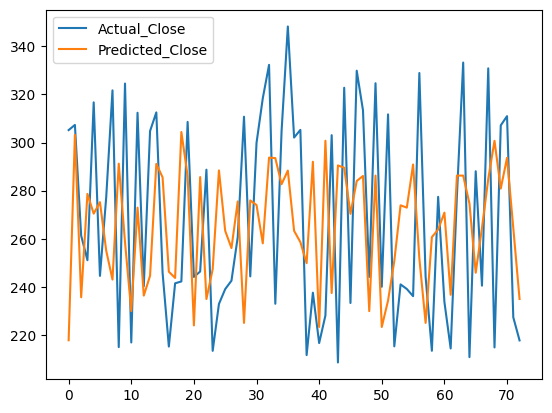

In [222]:
df_results[['Actual_Close', 'Predicted_Close']].plot()

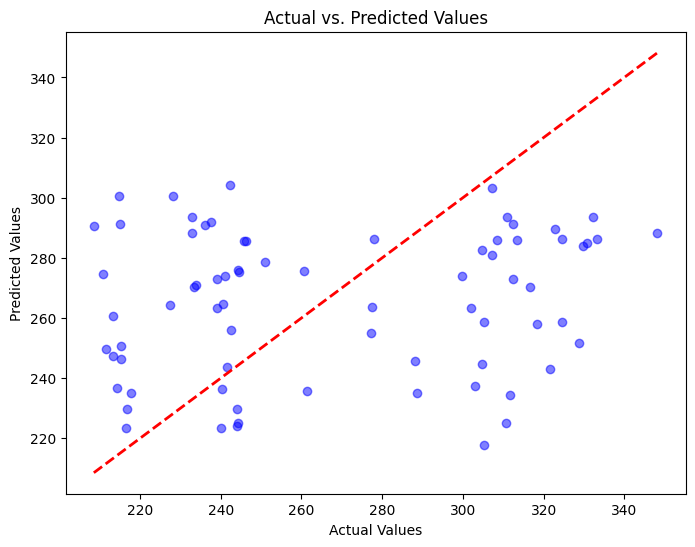

In [223]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()